In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean as dist
import syntheticdata_2gauss_shifttogether_20180426 as synth

In [2]:
peak1_pos = pd.DataFrame(synth.x0_2_shift)
peak1_height = pd.DataFrame(synth.time_coeff_1)
peak2_pos = pd.DataFrame(synth.x0_1_shift)
peak2_height = pd.DataFrame(synth.time_coeff_2 * 0.3)

In [3]:
time_slice = [[[peak2_pos.loc[i][0], peak2_height.loc[i][0], 100.0, i], [peak1_pos.loc[i][0], peak1_height.loc[i][0], 50, i]] for i in range(500)]

In [4]:
time_slice[327]

[[1113.5, 0.011401928122552293, 100.0, 327],
 [1234.5999999999851, 0.1949523712991825, 50, 327]]

In [5]:
peak1_dist = [time_slice[0][0]]
peak2_dist = [time_slice[0][1]]

def euc_dist(time1, time2, peaks):
    for i in range(peaks):
        for j in range(peaks):
            distance = dist(time1[i][:-1], time2[j][:-1])
# Need to make these if, elif statements more generic
            if ( i == 0 and distance <= 50 ):
                peak1_dist.append(time2[j])
            elif ( i == 1 and distance <= 50):
                peak2_dist.append(time2[j])
    return

In [6]:
def dist_all_time(full_array, time):
    for n in range(time):
        euc_dist(full_array[n], full_array[n+1], 2)
    return
dist_all_time(time_slice, 499)

In [7]:
peak1_dist_df = pd.DataFrame(peak1_dist, columns=['Position', 'Height', 'Width', 'Time'])
peak1_dist_df.describe()

,Position,Height,Width,Time
count,500.000000,500.000000,500.0,500.000000
mean,1074.750000,0.059894,100.0,249.500000
std,72.240916,0.074254,0.0,144.481833
min,950.000000,0.002042,100.0,0.000000
25%,1012.375000,0.007109,100.0,124.750000
50%,1074.750000,0.024749,100.0,249.500000
75%,1137.125000,0.086167,100.0,374.250000
max,1199.500000,0.300000,100.0,499.000000


In [8]:
peak2_dist_df = pd.DataFrame(peak2_dist, columns=['Position', 'Height', 'Width', 'Time'])
peak2_dist_df.describe()

,Position,Height,Width,Time
count,500.000000,500.000000,500.0,500.000000
mean,1250.100000,0.368085,50.0,249.500000
std,28.896367,0.253554,0.0,144.481833
min,1200.200000,0.082496,50.0,0.000000
25%,1225.150000,0.153931,50.0,124.750000
50%,1250.100000,0.287223,50.0,249.500000
75%,1275.050000,0.535932,50.0,374.250000
max,1300.000000,1.000000,50.0,499.000000


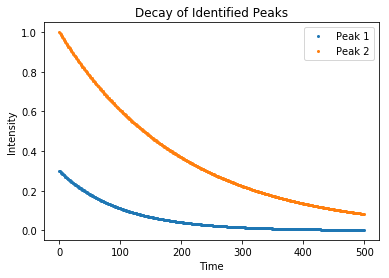

In [9]:
plt.plot(peak1_dist_df['Time'], peak1_dist_df['Height'], 'o', markersize = 2, label = 'Peak 1')
plt.plot(peak2_dist_df['Time'], peak2_dist_df['Height'], 'o', markersize = 2, label = 'Peak 2')
plt.title('Decay of Identified Peaks')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.show()

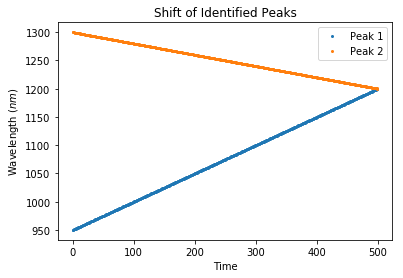

In [10]:
plt.plot(peak1_dist_df['Time'], peak1_dist_df['Position'], 'o', markersize = 2, label = 'Peak 1')
plt.plot(peak2_dist_df['Time'], peak2_dist_df['Position'], 'o', markersize = 2, label = 'Peak 2')
plt.title('Shift of Identified Peaks')
plt.xlabel('Time')
plt.ylabel('Wavelength $(nm)$')
plt.legend()
plt.show()

In [11]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx


def loaddata(data_filename):
    """load matrix data"""
    data = np.genfromtxt(data_filename, delimiter='\t')
    data_nm = data[1:,0]    #wavelength in nm
    data_time = data[0,1:]
    data_z = data[1:, 1:]

    return data_nm, data_time, data_z


def loaddata_timeslice(data_filename):
    """load array data"""
    data = np.genfromtxt(data_filename, delimiter='\t')
    data_nm = data[:,0]    #wavelength in nm
    data_z_array = data[:, 1]

    return data_nm, data_z_array

def twodcontourplot(tadata_nm, tadata_timedelay, tadata_z_corr):
    """
    make contour plot
    
    Args:
        tadata_nm: wavelength array
        tadata_timedelay: time delay array
        tadata_z_corr: matrix of z values
        
    """
    nm, timedelay = np.linspace(tadata_nm.min(), tadata_nm.max(), 100), np.linspace(tadata_timedelay.min(), tadata_timedelay.max(), 100)    
    timedelayi, nmi = np.meshgrid(tadata_timedelay, tadata_nm)

    #find the maximum and minimum
    #these are used for color bar
    z_min = np.amin(np.amin(tadata_z_corr, axis = 1))
    z_max = np.amax(np.amax(tadata_z_corr, axis = 1))

    
    return [nmi, timedelayi, z_min, z_max]

In [12]:
filename = '20180418_twogaussian_spectralshfit_together.txt'
nm, time, z = loaddata(filename)

In [13]:
original_contour = twodcontourplot(nm, time, z)
nm_contour, time_contour, min_contour, max_contour = original_contour[0], original_contour[1], original_contour[2], original_contour[3]

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>